In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import csv
from collections import Counter
import itertools
import copy
import os
import glob
import json

def simulate_ER(n,prob, opq_prob, opq_Set,S, iteration):
    # remember to sort q in descending order
    R_list = []
    num_choice = n + len(opq_Set)
    population = list(range(num_choice))
    weight = prob+opq_prob
    for t in range(iteration):
        inv = [S for i in range(n)]
        flag = 1
        while flag ==1:
            choice = random.choices(population, weights=weight, k=1)[0]
            if choice<n:
                inv[choice] = inv[choice]-1
            else:
                choice = opq_Set[choice-n]
                index_max = np.argmax([inv[index] for index in choice])
                inv[choice[index_max]] = inv[choice[index_max]] -1
            if min(inv)==0:
                R_list.append(n*S-sum(inv))
                flag = 0      
    return(np.average(R_list), np.average([i**2 for i in R_list]))

def cost(n,h,K,lamb, S, ER,ER2):
    holding = (2*n*S+1)*ER-ER2
    holding = float(h*holding)/(2*lamb*ER)
    ordering = float(K)/ER
    return(holding+ordering, holding, ordering)


# Parameters

n=3
K=10000
h=1
lamb=1
S = 50

# traditional selling, no opaque
q=0
prob = [float(1-q)/n for i in range(n)]
opq_Set = [[i for i in range(n)]]
opq_prob = [q]
[ER, ER2] = simulate_ER(n,prob, opq_prob, opq_Set,S, 20000)
baseline1 = cost(n,h,K,lamb, S, ER,ER2)

# compute the cost for symmetric q
new_list = np.arange(0.1, 0.75, 0.01)
baseline2 = []
for q in new_list:
    prob = [float(1-q)/n for i in range(n)]
    opq_Set = [[i for i in range(n)]]
    opq_prob = [q]
    [ER, ER2] = simulate_ER(n,prob, opq_prob, opq_Set,S, 20000)
    baseline2.append( cost(n,h,K,lamb, S, ER,ER2)[0])
    

# enumerete the asymmetric q1, q2, and q3 with q_min = 0.1
q3 = 0.1 # fix q_min at 0.1
q2_list = np.arange(0.1, 1, 0.01) # enumerate q2 from 0.1 to 1

opq_Set = [list(range(n))]
qlist = []
result = []
for q2 in q2_list:
    print(q2)
    qtemp = []
    temp = []
    for q1 in np.arange(q2, 1, 0.01): # enumerate q1 from q2 to 1
        q = float(q1+q2+q3)/n
        opq_prob = [q]
        qtemp.append(q)
        prob = [float(1-q1)/n, float(1-q2)/n, float(1-q3)/n]
        [ER, ER2] = simulate_ER(n,prob, opq_prob, opq_Set, S, 20000)
        temp.append(cost(n,h,K,lamb, S, ER,ER2)[0])
    qlist.append(qtemp)
    result.append(temp)

# generate figure 3, March 1st 2024
flatq =  list(itertools.chain.from_iterable(qlist))
flatresult = list(itertools.chain.from_iterable(result))

# plot figure 3 (a)
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
y = plt.plot(new_list, [100*(baseline1[0] - i)/baseline1[0] for i in baseline2], 'o-', label = '$symmetric, q_{min} = q_i$')
y=plt.plot( flatq, [100*(baseline1[0] - i)/baseline1[0] for i in flatresult], '*', color = 'c', label = '$asymmetric, q_{min} = 0.1$')

plt.ylabel('Relative Cost Savings (%)', fontsize = 14)
plt.xlabel('Total Fraction of Opaque Customers', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0, 0.75)
plt.ylim(4, 10)
plt.title('(a)', y = -0.25, fontsize = 14)

# plot figure 3 (b)
ax = plt.subplot(1, 2, 2)
y = plt.plot(new_list, [100*(baseline1[0] - i)/baseline1[0] for i in baseline2], 'o-', label = '$symmetric, q_{min} = q_i$')
create_marker = plt.plot([], [],  '*', color='c',label='$asymmetric, q_{min} = 0.1$')
y = plt.plot(qlist[10], [100*(baseline1[0] - i)/baseline1[0] for i in result[10]], '^', label = '$ q_{2} = 0.2, q_{3}\geq q_{2}$')
y = plt.plot(qlist[30], [100*(baseline1[0] - i)/baseline1[0] for i in result[30]], 'D', label = '$q_{2} = 0.4, q_{3}\geq q_{2}$')
y = plt.plot(qlist[50], [100*(baseline1[0] - i)/baseline1[0] for i in result[50]], 's', label = '$ q_{2} = 0.6, q_{3}\geq q_{2}$')
y = plt.plot(qlist[70], [100*(baseline1[0] - i)/baseline1[0] for i in result[70]], 'x', label = '$q_{2} = 0.8, q_{3}\geq q_{2}$')

plt.ylabel('Relative Cost Savings (%)', fontsize = 14)
plt.xlabel('Total Fraction of Opaque Customers', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
# plt.legend(fontsize = 12, loc = 'best')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0, 0.75)
plt.ylim(4, 10)
plt.legend(fontsize = 12, loc = (1.01, 0.2))
plt.title('(b)', y = -0.25, fontsize = 14)

plt.show()
#fig.savefig('asym_vs_sym.pdf',bbox_inches='tight')

In [ ]:
# traditional selling, no opaque
q=0
prob = [float(1-q)/n for i in range(n)]
opq_Set = [[i for i in range(n)]]
opq_prob = [q]
[ER, ER2] = simulate_ER(n,prob, opq_prob, opq_Set,S, 20000)
baseline1 = cost(n,h,K,lamb, S, ER,ER2)

# compute the cost for symmetric q

new_list = np.arange(0.1, 0.75, 0.01)
baseline2 = []
for q in new_list:
    prob = [float(1-q)/n for i in range(n)]
    opq_Set = [[i for i in range(n)]]
    opq_prob = [q]
    [ER, ER2] = simulate_ER(n,prob, opq_prob, opq_Set,S, 20000)
    baseline2.append( cost(n,h,K,lamb, S, ER,ER2)[0])

In [18]:
q3 = 0.1 # fix q_min at 0.1
q2_list = np.arange(0.1, 1, 0.01) # enumerate q2 from 0.1 to 1

opq_Set = [list(range(n))]
qlist = []
result = []
for q2 in q2_list:
    print(q2)
    qtemp = []
    temp = []
    for q1 in np.arange(q2, 1, 0.01): # enumerate q1 from q2 to 1
        q = float(q1+q2+q3)/n
        opq_prob = [q]
        qtemp.append(q)
        prob = [float(1-q1)/n, float(1-q2)/n, float(1-q3)/n]
        [ER, ER2] = simulate_ER(n,prob, opq_prob, opq_Set, S, 20000)
        temp.append(cost(n,h,K,lamb, S, ER,ER2)[0])
    qlist.append(qtemp)
    result.append(temp)

        

0.1
0.11
0.12
0.13
0.13999999999999999
0.14999999999999997
0.15999999999999998
0.16999999999999998
0.17999999999999997
0.18999999999999995
0.19999999999999996
0.20999999999999996
0.21999999999999995
0.22999999999999995
0.23999999999999994
0.24999999999999992
0.2599999999999999
0.2699999999999999
0.2799999999999999
0.2899999999999999
0.29999999999999993
0.30999999999999994
0.3199999999999999
0.32999999999999985
0.33999999999999986
0.34999999999999987
0.3599999999999999
0.3699999999999999
0.3799999999999999
0.3899999999999999
0.3999999999999998
0.4099999999999998
0.4199999999999998
0.4299999999999998
0.43999999999999984
0.44999999999999984
0.45999999999999985
0.46999999999999986
0.47999999999999976
0.48999999999999977
0.4999999999999998
0.5099999999999998
0.5199999999999998
0.5299999999999998
0.5399999999999998
0.5499999999999998
0.5599999999999997
0.5699999999999997
0.5799999999999997
0.5899999999999997
0.5999999999999998
0.6099999999999998
0.6199999999999998
0.6299999999999997
0.639999

In [20]:
new_list = np.arange(0.1, 0.75, 0.01)
baseline2 = [152.5829189630361, 151.95725486479768, 151.59251380843034, 151.12325876257108, 150.79486855794946, 150.38997178142608, 150.0232682053501, 149.6549869769778, 149.34097894952546, 149.05619027242653, 148.75421183527635, 148.53286767394027, 148.23143685280604, 148.06515302115483, 147.85259690218487, 147.71688980857547, 147.51109727546697, 147.33204928291337, 147.22595227966917, 147.00073037047412, 146.89382189069204, 146.75182945791428, 146.62979754187484, 146.51954595056975, 146.4510094600692, 146.31866507735862, 146.2402964405585, 146.14083363963528, 146.07057042289, 145.97082607181397, 145.93074384352823, 145.8019575114328, 145.7399251669794, 145.69347988282516, 145.63952246132487, 145.5571177756426, 145.4988052741999, 145.44060898258178, 145.41502124183285, 145.34981192119272, 145.3145737248455, 145.23540990174024, 145.19141848328775, 145.15854333668358, 145.12244047691988, 145.08865693878266, 145.03023724524073, 144.99792277751988, 144.9550419465255, 144.9234327737762, 144.90272428419613, 144.86778085191034, 144.82694587388121, 144.78749020332265, 144.7553791239271, 144.7276144999367, 144.70607326168437, 144.6708347357335, 144.64561713814476, 144.62481217951807, 144.59594682625618, 144.58921846484384, 144.55665746581207, 144.5261613216254, 144.49846778000418]

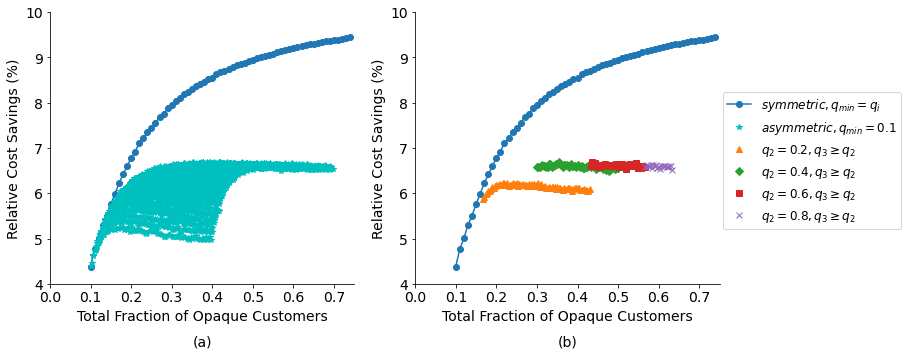

In [150]:
# generate figure 3, March 1st 2024

flatq =  list(itertools.chain.from_iterable(qlist))
flatresult = list(itertools.chain.from_iterable(result))
# print(flatresult)
############################################################################
# plot figure 3
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
y = plt.plot(new_list, [100*(baseline1[0] - i)/baseline1[0] for i in baseline2], 'o-', label = '$symmetric, q_{min} = q_i$')
y=plt.plot( flatq, [100*(baseline1[0] - i)/baseline1[0] for i in flatresult], '*', color = 'c', label = '$asymmetric, q_{min} = 0.1$')

plt.ylabel('Relative Cost Savings (%)', fontsize = 14)
plt.xlabel('Total Fraction of Opaque Customers', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlim(0, 0.75)
plt.ylim(4, 10)
plt.title('(a)', y = -0.25, fontsize = 14)


ax = plt.subplot(1, 2, 2)
# y=plt.plot( qlist[0], [100*(baseline1[0] - i)/baseline1[0] for i in result[0]], '*', label = '$ q_{2} = 0.1$')
y = plt.plot(new_list, [100*(baseline1[0] - i)/baseline1[0] for i in baseline2], 'o-', label = '$symmetric, q_{min} = q_i$')
create_marker = plt.plot([], [],  '*', color='c',label='$asymmetric, q_{min} = 0.1$')

y = plt.plot(qlist[10], [100*(baseline1[0] - i)/baseline1[0] for i in result[10]], '^', label = '$ q_{2} = 0.2, q_{3}\geq q_{2}$')
# y = plt.plot(qlist[30], [100*(baseline1[0] - i)/baseline1[0] for i in result[30]], 'o', label = '$ q_{2} = 0.4$')
y = plt.plot(qlist[30], [100*(baseline1[0] - i)/baseline1[0] for i in result[30]], 'D', label = '$q_{2} = 0.4, q_{3}\geq q_{2}$')
# y = plt.plot(qlist[50], [100*(baseline1[0] - i)/baseline1[0] for i in result[50]], '*', label = '$ q_{2} = 0.6$')
y = plt.plot(qlist[50], [100*(baseline1[0] - i)/baseline1[0] for i in result[50]], 's', label = '$ q_{2} = 0.6, q_{3}\geq q_{2}$')
# y = plt.plot(qlist[70], [100*(baseline1[0] - i)/baseline1[0] for i in result[70]], '*', label = '$ q_{2} = 0.8$')
y = plt.plot(qlist[70], [100*(baseline1[0] - i)/baseline1[0] for i in result[70]], 'x', label = '$q_{2} = 0.8, q_{3}\geq q_{2}$')




plt.ylabel('Relative Cost Savings (%)', fontsize = 14)
plt.xlabel('Total Fraction of Opaque Customers', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
# plt.legend(fontsize = 12, loc = 'best')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0, 0.75)
plt.ylim(4, 10)
plt.legend(fontsize = 12, loc = (1.01, 0.2))
plt.title('(b)', y = -0.25, fontsize = 14)

plt.show()
fig.savefig('asym_vs_sym.pdf',bbox_inches='tight')

In [17]:
q1 = 0.4
q2 = 0.5
q3 = 0.6

prob = [float(1-q1)/n, float(1-q2)/n, float(1-q3)/n]
[ER, ER2] = simulate_ER(n,prob, opq_prob, opq_Set, S, 10000)
print(cost(n,h,K,lamb, S, ER,ER2)[0] )


q1 = 0.6
q2 = 0.5
q3 = 0.4

prob = [float(1-q1)/n, float(1-q2)/n, float(1-q3)/n]
[ER, ER2] = simulate_ER(n,prob, opq_prob, opq_Set, S, 10000)
print(cost(n,h,K,lamb, S, ER,ER2)[0] )

146.0979607002736
145.67567397622048


In [28]:
min(flatresult)

148.88415971763987

In [30]:
import json

txtname2 = "Figure3_asymmetric.txt"
with open(txtname2, 'w') as out_file:
    json.dump(flatresult, out_file)

In [31]:
import json

txtname2 = "Figure3_asymmetric_q.txt"
with open(txtname2, 'w') as out_file:
    json.dump(flatq, out_file)

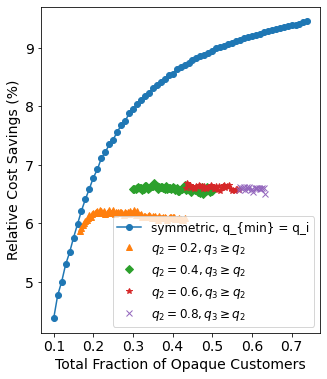

In [109]:
# flatq =  list(itertools.chain.from_iterable(qlist))
# flatresult = list(itertools.chain.from_iterable(result))
# print(flatresult)
############################################################################
# plot figure 3
fig = plt.figure(figsize=(5, 6))
# ax = plt.subplot(1, 1, 1)
# y=plt.plot( qlist[0], [100*(baseline1[0] - i)/baseline1[0] for i in result[0]], '*', label = '$ q_{2} = 0.1$')
y = plt.plot(new_list, [100*(baseline1[0] - i)/baseline1[0] for i in baseline2], 'o-', label = 'symmetric, q_{min} = q_i')
y = plt.plot(qlist[10], [100*(baseline1[0] - i)/baseline1[0] for i in result[10]], '^', label = '$ q_{2} = 0.2, q_{3}\geq q_{2}$')
# y = plt.plot(qlist[30], [100*(baseline1[0] - i)/baseline1[0] for i in result[30]], 'o', label = '$ q_{2} = 0.4$')
y = plt.plot(qlist[30], [100*(baseline1[0] - i)/baseline1[0] for i in result[30]], 'D', label = '$q_{2} = 0.4, q_{3}\geq q_{2}$')
# y = plt.plot(qlist[50], [100*(baseline1[0] - i)/baseline1[0] for i in result[50]], '*', label = '$ q_{2} = 0.6$')
y = plt.plot(qlist[50], [100*(baseline1[0] - i)/baseline1[0] for i in result[50]], '*', label = '$ q_{2} = 0.6, q_{3}\geq q_{2}$')
# y = plt.plot(qlist[70], [100*(baseline1[0] - i)/baseline1[0] for i in result[70]], '*', label = '$ q_{2} = 0.8$')
y = plt.plot(qlist[70], [100*(baseline1[0] - i)/baseline1[0] for i in result[70]], 'x', label = '$q_{2} = 0.8, q_{3}\geq q_{2}$')

plt.ylabel('Relative Cost Savings (%)', fontsize = 14)
plt.xlabel('Total Fraction of Opaque Customers', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12, loc = 'best')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.xlim(0.1, 0.65)
# plt.ylim(5,9.5)
plt.show()
fig.savefig('asym_vs_sym_specific.pdf',bbox_inches='tight')

In [177]:
max([100*(baseline1[0] - i)/baseline1[0] for i in result[70]])

6.621562986382603

In [176]:
min([100*(baseline1[0] - i)/baseline1[0] for i in result[70]])

6.50686804457962

In [158]:
min([100*(baseline1[0] - i)/baseline1[0] for i in flatresult])

4.385579105832403

In [159]:
max([100*(baseline1[0] - i)/baseline1[0] for i in flatresult])

6.700550857136504

In [160]:
max([100*(baseline1[0] - i)/baseline1[0] for i in baseline2])

9.448879777202459

In [169]:
new_list[60]
# baseline2[10]

0.6999999999999996

In [170]:
[100*(baseline1[0] - i)/baseline1[0] for i in [baseline2[60]]]

[9.387793753440548]

[0.2999999999999999,
 0.3033333333333332,
 0.30666666666666653,
 0.3099999999999999,
 0.3133333333333332,
 0.31666666666666654,
 0.3199999999999999,
 0.3233333333333332,
 0.32666666666666655,
 0.3299999999999999,
 0.3333333333333332,
 0.3366666666666666,
 0.3399999999999999,
 0.34333333333333327,
 0.3466666666666666,
 0.3499999999999999,
 0.3533333333333333,
 0.35666666666666663,
 0.35999999999999993,
 0.3633333333333333,
 0.36666666666666664,
 0.36999999999999994,
 0.3733333333333333,
 0.37666666666666665,
 0.37999999999999995,
 0.3833333333333333,
 0.38666666666666666,
 0.38999999999999996,
 0.3933333333333333,
 0.39666666666666667,
 0.39999999999999997,
 0.4033333333333333,
 0.4066666666666667,
 0.41,
 0.41333333333333333,
 0.4166666666666667,
 0.42,
 0.42333333333333334,
 0.4266666666666667,
 0.43,
 0.43333333333333335,
 0.4366666666666667,
 0.44,
 0.44333333333333336,
 0.4466666666666667,
 0.45,
 0.45333333333333337,
 0.4566666666666667,
 0.46,
 0.4633333333333334,
 0.466666666666